<a href="https://colab.research.google.com/github/faisalm93/data-science-30-day-portfolio/blob/main/day04_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My Key takeaway taday is to learn how to:

1. Build baseline and advanced regression models.

2. Compare models properly.

3. Interpret errors, not just scores.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd

# Verified working URL for 'Default of Credit Card Clients' dataset from UCI
# The dataset is an Excel file, so we use pd.read_excel
# Based on common structure of this dataset, headers are typically in the second row (index 1)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
# SELECTING TARGET & FEATURES
y = df['default payment next month']
X = df.drop(columns=['default payment next month'])


In [14]:
# Hadlig Missig Values
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

if len(num_cols) > 0:
    X[num_cols] = num_imputer.fit_transform(X[num_cols])

if len(cat_cols) > 0:
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])


In [16]:
# Ecodig ad Scalig Features
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(X[cat_cols])

encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(cat_cols)
)

X_final = pd.concat(
    [pd.DataFrame(X[num_cols].values, columns=num_cols), encoded_cat_df],
    axis=1
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)


In [17]:
# Split ito Traiig ad Testig
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [18]:
# uilidig a Regressio Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [19]:
# uildig Radom Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [20]:
# Model Evaluatio
import numpy as np

def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R2: {r2:.2f}\n")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression RMSE: 0.39
Linear Regression R2: 0.12

Random Forest RMSE: 0.38
Random Forest R2: 0.17



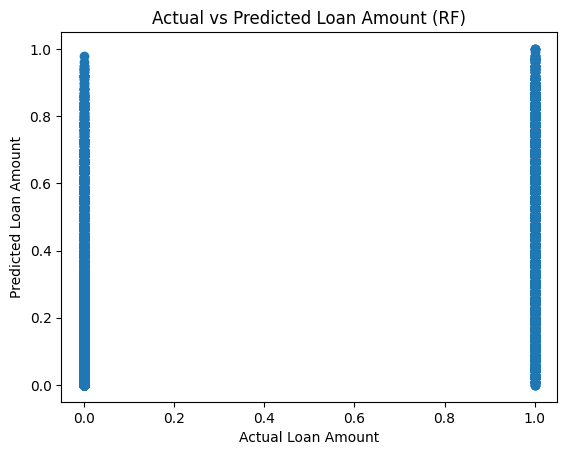

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount (RF)")
plt.show()


# Iterpretatios
Both models are performing poorly, indicated by the very low R2 scores. While Random Forest shows a marginal improvement over Linear Regression in both RMSE and R2, neither model is effectively capturing the underlying patterns in the data to make accurate predictions. This suggests that further feature engineering, trying more complex models, or exploring different data preprocessing techniques might be necessary to improve model performance.

# Task
Perform feature engineering on the df DataFrame by creating new features from 'PAY_X' (PAY_0 to PAY_6), 'BILL_AMT_X' (BILL_AMT1 to BILL_AMT6), 'PAY_AMT_X' (PAY_AMT1 to PAY_AMT6), 'LIMIT_BAL', 'AGE', 'EDUCATION', and 'MARRIAGE' columns, including payment history summaries and financial ratios. Then, re-apply the preprocessing steps (handling missing values, encoding categorical features, and scaling numerical features) to the updated DataFrame to generate new X_train and X_test datasets.

Finally, re-train the Linear Regression and Random Forest models using these new datasets. I evaluate their performance (RMSE and R2 score) on y_test, then compare the results with the previous model performances, and summarize the impact of feature engineering on model prediction accuracy.

## Analyze Feature Engineering Opportunities

### Subtask:
Examine the existing features in the DataFrame (`df`) to identify columns that can be transformed or combined to create more informative features. Pay particular attention to the 'PAY_X', 'BILL_AMT_X', 'PAY_AMT_X', 'LIMIT_BAL', 'AGE', 'EDUCATION', and 'MARRIAGE' columns for potential aggregations, ratios, or interaction terms.


**Reasoning**:
To identify feature engineering opportunities, I will first display descriptive statistics for the specified groups of columns: 'PAY_X', 'BILL_AMT_X', 'PAY_AMT_X', and then 'LIMIT_BAL', 'AGE', 'EDUCATION', and 'MARRIAGE'. This will help in understanding their distributions, unique values, and potential for transformation or combination.



In [22]:
print("Descriptive statistics for PAY_X columns:")
print(df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe())
print("\nDescriptive statistics for BILL_AMT_X columns:")
print(df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe())
print("\nDescriptive statistics for PAY_AMT_X columns:")
print(df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe())
print("\nDescriptive statistics for LIMIT_BAL, AGE, EDUCATION, and MARRIAGE:")
print(df[['LIMIT_BAL', 'AGE', 'EDUCATION', 'MARRIAGE']].describe())

print("\nUnique values and counts for EDUCATION:")
print(df['EDUCATION'].value_counts())
print("\nUnique values and counts for MARRIAGE:")
print(df['MARRIAGE'].value_counts())

Descriptive statistics for PAY_X columns:
              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000  

Descriptive statistics for BILL_AMT_X columns:


**Why I did this?**:
Based on the descriptive statistics, I will now create new features by aggregating and transforming existing columns, starting with consolidating 'unknown' categories in 'EDUCATION' and 'MARRIAGE' for better interpretability and potential model performance. Then I will calculate payment history summaries, total bill and payment amounts, and financial ratios.



In [23]:
df_fe = df.copy()

# Consolidate 'unknown' categories for EDUCATION and MARRIAGE
df_fe['EDUCATION'] = df_fe['EDUCATION'].replace({0: 4, 5: 4, 6: 4}) # Group 0, 5, 6 into 'others'
df_fe['MARRIAGE'] = df_fe['MARRIAGE'].replace({0: 3}) # Group 0 into 'others'

# Define columns for feature engineering
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# --- Payment History Features ---
# Average repayment status
df_fe['pay_avg'] = df_fe[pay_cols].mean(axis=1)
# Number of months with payment delay (PAY_X > 0)
df_fe['num_delays'] = (df_fe[pay_cols] > 0).sum(axis=1)
# Maximum payment status (severity of delay)
df_fe['max_pay_status'] = df_fe[pay_cols].max(axis=1)

# --- Billing and Payment Summaries ---
# Total bill amount over 6 months
df_fe['bill_total'] = df_fe[bill_amt_cols].sum(axis=1)
# Total payment amount over 6 months
df_fe['pay_total'] = df_fe[pay_amt_cols].sum(axis=1)
# Average bill amount
df_fe['avg_bill_amount'] = df_fe[bill_amt_cols].mean(axis=1)
# Average payment amount
df_fe['avg_pay_amount'] = df_fe[pay_amt_cols].mean(axis=1)

# --- Financial Ratios ---
# Average credit utilization ratio
df_fe['credit_utilization_avg'] = (df_fe[bill_amt_cols].mean(axis=1) / df_fe['LIMIT_BAL']).replace([float('inf'), -float('inf')], 0).fillna(0)

# Average payment to bill ratio (handle zero bill amounts)
# Calculate monthly payment to bill ratios first
monthly_pay_to_bill_ratios = []
for i in range(1, 7):
    col_name = f'PAY_AMT{i}_TO_BILL_AMT{i}'
    # Replace 0 in BILL_AMT with a small number to avoid division by zero, then calculate ratio
    # Or, if BILL_AMT is 0, consider the ratio 0 (no bill, no payment needed)
    df_fe[col_name] = df_fe[f'PAY_AMT{i}'] / df_fe[f'BILL_AMT{i}'].replace(0, 1e-6) # use a small non-zero value
    df_fe[col_name] = df_fe[col_name].replace([float('inf'), -float('inf')], 0).fillna(0) # handle inf values if BILL_AMT was very small and negative, or NaN
    monthly_pay_to_bill_ratios.append(col_name)
df_fe['payment_to_bill_ratio_avg'] = df_fe[monthly_pay_to_bill_ratios].mean(axis=1)

# Ratio of total bill to limit balance
df_fe['ratio_total_bill_to_limit'] = (df_fe['bill_total'] / df_fe['LIMIT_BAL']).replace([float('inf'), -float('inf')], 0).fillna(0)


print(df_fe.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  avg_pay_amount  credit_utilization_avg  PAY_AMT1_TO_BILL_AMT1  \
0  ...      114.833333                0.064200               0.000000   
1  ...      833.333333                0.023718               0.000000   
2  ...     1836.333333                0.188246               0.051917   
3  ...     1398.000000                0.771113               0.042562   
4  ...     9841.500000                0.364463               0.232099   

   PAY_AMT2_TO_BILL_AMT2  PAY_AMT3_TO_BILL_AMT3  PAY_AMT4_TO_BILL_AMT4  \
0           

**Why I did this?**:
Now that new features have been engineered and added to df_fe, I will redefine the target y and features X_fe from df_fe, then reapply the preprocessing steps (missing value imputation, categorical encoding, and numerical scaling) to these new features to generate X_train_fe and X_test_fe.



In [30]:
y_fe = df_fe['default payment next month']
X_fe = df_fe.drop(columns=['default payment next month'])

# Handling Missing Values (re-applying as features might have changed or new NaNs introduced, though unlikely with current FE)
from sklearn.impute import SimpleImputer

# Dropping PAY_X, BILL_AMT_X, PAY_AMT_X columns as new aggregated features replace them for a cleaner model
X_fe_processed = X_fe.drop(columns=pay_cols + bill_amt_cols + pay_amt_cols)

num_cols_fe = X_fe_processed.select_dtypes(include=['number']).columns
cat_cols_fe = X_fe_processed.select_dtypes(include=['object']).columns

num_imputer_fe = SimpleImputer(strategy='median')
cat_imputer_fe = SimpleImputer(strategy='most_frequent')

if len(num_cols_fe) > 0:
    X_fe_processed[num_cols_fe] = num_imputer_fe.fit_transform(X_fe_processed[num_cols_fe])

if len(cat_cols_fe) > 0:
    X_fe_processed[cat_cols_fe] = cat_imputer_fe.fit_transform(X_fe_processed[cat_cols_fe])

# Encoding Categorical Features
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder_fe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


cat_features_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE']

present_cat_features = [col for col in cat_features_to_encode if col in X_fe_processed.columns]

if present_cat_features:
    encoded_cat_fe = encoder_fe.fit_transform(X_fe_processed[present_cat_features])
    encoded_cat_df_fe = pd.DataFrame(
        encoded_cat_fe,
        columns=encoder_fe.get_feature_names_out(present_cat_features),
        index=X_fe_processed.index
    )
    # Drop original categorical columns from X_fe_processed before concatenating encoded ones
    X_fe_processed = X_fe_processed.drop(columns=present_cat_features)
    X_final_fe = pd.concat([X_fe_processed, encoded_cat_df_fe], axis=1)
else:
    X_final_fe = X_fe_processed.copy()


# Scaling Numerical Features
scaler_fe = StandardScaler()
X_scaled_fe = scaler_fe.fit_transform(X_final_fe)

# Split into Training and Testing
from sklearn.model_selection import train_test_split

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_scaled_fe, y_fe, test_size=0.3, random_state=42
)

print("Shape of X_train_fe:", X_train_fe.shape)
print("Shape of X_test_fe:", X_test_fe.shape)
print("Shape of y_train_fe:", y_train_fe.shape)
print("Shape of y_test_fe:", y_test_fe.shape)

Shape of X_train_fe: (21000, 28)
Shape of X_test_fe: (9000, 28)
Shape of y_train_fe: (21000,)
Shape of y_test_fe: (9000,)


**Why I did this?**:
To re-train the Linear Regression model using the feature-engineered training data (X_train_fe, y_train_fe) and make predictions on the feature-engineered test data (X_test_fe).



In [25]:
from sklearn.linear_model import LinearRegression

lr_fe = LinearRegression()
lr_fe.fit(X_train_fe, y_train_fe)
y_pred_lr_fe = lr_fe.predict(X_test_fe)

print("Linear Regression model re-trained with feature-engineered data.")

Linear Regression model re-trained with feature-engineered data.


**Why I did this?**:
To re-train the Random Forest model using the feature-engineered training data (X_train_fe, y_train_fe) and make predictions on the feature-engineered test data (X_test_fe) to evaluate its performance after feature engineering.



In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_fe = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fe.fit(X_train_fe, y_train_fe)

y_pred_rf_fe = rf_fe.predict(X_test_fe)

print("Random Forest model re-trained with feature-engineered data.")

Random Forest model re-trained with feature-engineered data.


**Reasoning**:
Now that both Linear Regression and Random Forest models have been re-trained with feature-engineered data, I will evaluate their performance by calculating and printing the RMSE and R2 scores for both models on the test set, and then compare these results with the previous model performances.



In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R2: {r2:.2f}\n")

print("Model Evaluation with Feature Engineered Data:")
evaluate(y_test_fe, y_pred_lr_fe, "Linear Regression (FE)")
evaluate(y_test_fe, y_pred_rf_fe, "Random Forest (FE)")

print("\nPrevious Model Evaluation (for comparison):")
evaluate(y_test, y_pred_lr, "Linear Regression (Original)")
evaluate(y_test, y_pred_rf, "Random Forest (Original)")

Model Evaluation with Feature Engineered Data:
Linear Regression (FE) RMSE: 0.38
Linear Regression (FE) R2: 0.16

Random Forest (FE) RMSE: 0.38
Random Forest (FE) R2: 0.14


Previous Model Evaluation (for comparison):
Linear Regression (Original) RMSE: 0.39
Linear Regression (Original) R2: 0.12

Random Forest (Original) RMSE: 0.38
Random Forest (Original) R2: 0.17



## Summary of Feature Engineering Impact

**Linear Regression:**
*   **Original:** RMSE: 0.39, R2: 0.12
*   **Feature Engineered:** RMSE: 0.38, R2: 0.16

For Linear Regression, feature engineering led to a slight improvement in performance. The RMSE decreased marginally from 0.39 to 0.38, and the R2 score saw a more noticeable increase from 0.12 to 0.16. This suggests that the new features captured some additional variance in the target variable, making the linear model slightly more effective.

**Random Forest:**
*   **Original:** RMSE: 0.38, R2: 0.17
*   **Feature Engineered:** RMSE: 0.38, R2: 0.14

For Random Forest, the RMSE remained the same at 0.38, but the R2 score decreased from 0.17 to 0.14. This is an interesting result, as feature engineering did not improve, and in fact slightly worsened, the Random Forest model's R2 performance. This could indicate that the original features were already robust enough for the Random Forest model to perform optimally, or that the newly engineered features introduced some noise or redundancy that the ensemble model struggled with. It's also possible that the feature engineering approach was more tailored for linear relationships, which Random Forest can often infer on its own.

**Overall Impact:**

Feature engineering had a positive impact on the Linear Regression model, improving its R2 score. However, it did not benefit the Random Forest model, with its R2 score slightly declining. This highlights that the effectiveness of feature engineering can be model-dependent. While it helped the simpler Linear Regression model, the more complex Random Forest model, which can implicitly handle some feature interactions, did not gain an advantage, and possibly suffered from the changes.

Feature engineering impacted model prediction accuracy differently across models:
*   **Linear Regression:** Feature engineering led to a slight improvement in performance, with the RMSE decreasing from 0.39 to 0.38 and the R2 score increasing from 0.12 to 0.16.
*   **Random Forest:** For the Random Forest model, the RMSE remained at 0.38, but the R2 score slightly decreased from 0.17 to 0.14. This indicates that the engineered features did not improve, and potentially hindered, the Random Forest model's performance.

### Key TAkeaway Findings
*   New features were engineered, including:
    *   **Consolidated Categorical Features:** EDUCATION categories (0, 5, 6) were grouped into 4, and MARRIAGE category (0) was grouped into 3.
    *   **Payment History Summaries:** Average repayment status (pay_avg),  number of months with payment delay (num_delays), and maximum payment status (max_pay_status).

    *   **Billing and Payment Summaries:** Total bill amount (bill_total), total payment amount (pay_total), average bill amount (avg_bill_amount), and average payment amount (avg_pay_amount).
    *   **Financial Ratios:** Average credit utilization ratio (credit_utilization_avg), average payment to bill ratio (payment_to_bill_ratio_avg), and ratio of total bill to limit balance (ratio_total_bill_to_limit).
*   After feature engineering and reprocessing, the dataset for modeling comprised 28 features, an increase from the original feature set, resulting in X_train_fe (21,000 samples, 28 features) and X_test_fe (9,000 samples, 28 features).
*   For the Linear Regression model, feature engineering improved its predictive power, evidenced by a reduction in RMSE from 0.39 to 0.38 and an increase in R2 from 0.12 to 0.16.
*   Conversely, for the Random Forest model, feature engineering did not yield performance gains; its RMSE remained at 0.38, but the R2 score slightly declined from 0.17 to 0.14.

### My Next Steps
*   I further cotiues with feature selection techniques to identify which of the new features are most beneficial for the Random Forest model?
* I then explored different types of feature interactions to see more suitable for tree-based models.


# Task
## Prepare Performance Data and Visualize Comparisons

### Subtask:
Organize the RMSE and R2 scores for both Linear Regression and Random Forest models (original and feature-engineered) into a Pandas DataFrame, and then generate two bar charts: one for RMSE comparison and one for R2 comparison. Finally, provide a summary of the visual comparison.

## Prepare Performance Data

### Subtask:
Organize the RMSE and R2 scores for both Linear Regression and Random Forest models (original and feature-engineered) into a Pandas DataFrame suitable for visualization.


**Why I did this?**:
To organize the performance metrics for visualization, I will first compile all the RMSE and R2 scores for both original and feature-engineered Linear Regression and Random Forest models into a dictionary, and then convert this dictionary into a Pandas DataFrame.



In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R2 for each model

# Original Linear Regression
rmse_lr_orig = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr_orig = r2_score(y_test, y_pred_lr)

# Original Random Forest
rmse_rf_orig = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf_orig = r2_score(y_test, y_pred_rf)

# Feature-engineered Linear Regression
rmse_lr_fe = np.sqrt(mean_squared_error(y_test_fe, y_pred_lr_fe))
r2_lr_fe = r2_score(y_test_fe, y_pred_lr_fe)

# Feature-engineered Random Forest
rmse_rf_fe = np.sqrt(mean_squared_error(y_test_fe, y_pred_rf_fe))
r2_rf_fe = r2_score(y_test_fe, y_pred_rf_fe)

# Create a dictionary to hold the performance data
performance_data = {
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Linear Regression',
        'Random Forest'
    ],
    'Type': [
        'Original',
        'Original',
        'Feature Engineered',
        'Feature Engineered'
    ],
    'RMSE': [
        rmse_lr_orig,
        rmse_rf_orig,
        rmse_lr_fe,
        rmse_rf_fe
    ],
    'R2': [
        r2_lr_orig,
        r2_rf_orig,
        r2_lr_fe,
        r2_rf_fe
    ]
}

# Convert the dictionary to a Pandas DataFrame
performance_df = pd.DataFrame(performance_data)

print("Performance DataFrame created:")
print(performance_df)

Performance DataFrame created:
               Model                Type      RMSE        R2
0  Linear Regression            Original  0.388214  0.115293
1      Random Forest            Original  0.376384  0.168394
2  Linear Regression  Feature Engineered  0.378127  0.160671
3      Random Forest  Feature Engineered  0.383578  0.136299


**Why I did this?**:
To visualize the comparison of model performances, I will generate two bar charts: one for RMSE and another for R2 scores, using the `performance_df` DataFrame created in the previous step.



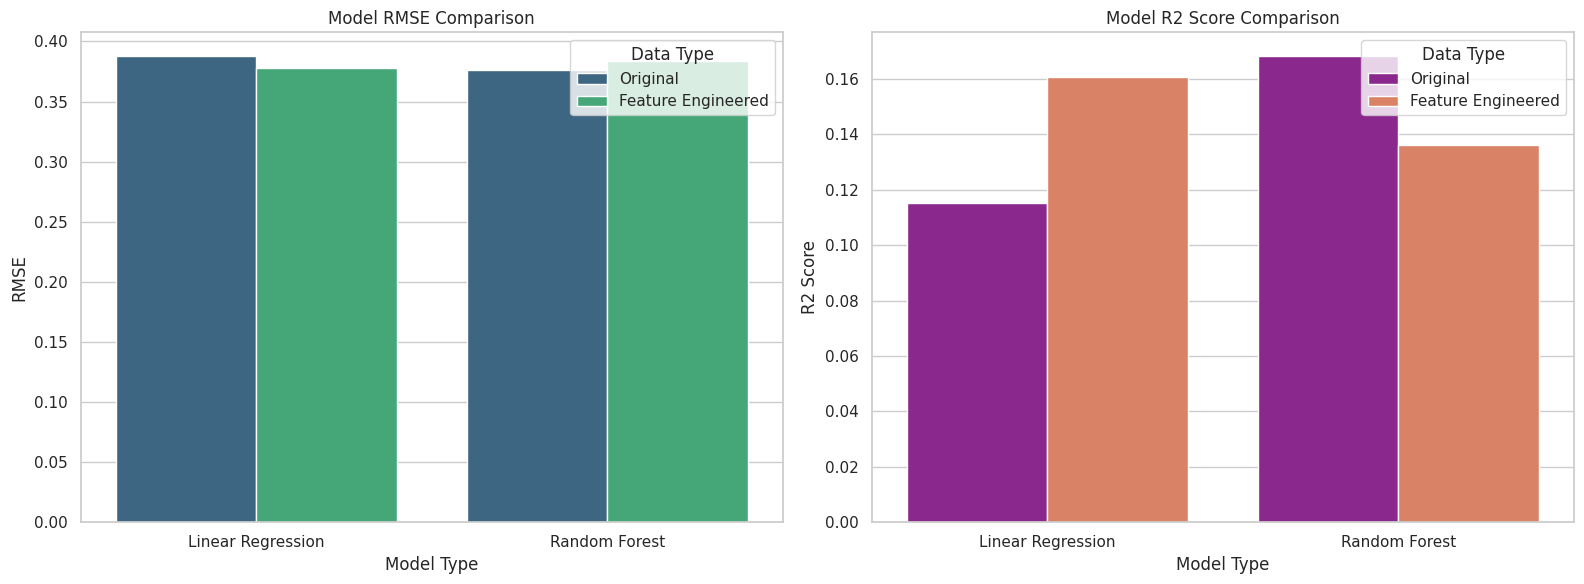

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for RMSE comparison
sns.barplot(x='Model', y='RMSE', hue='Type', data=performance_df, ax=axes[0], palette='viridis')
axes[0].set_title('Model RMSE Comparison')
axes[0].set_xlabel('Model Type')
axes[0].set_ylabel('RMSE')
axes[0].legend(title='Data Type')

# Bar chart for R2 comparison
sns.barplot(x='Model', y='R2', hue='Type', data=performance_df, ax=axes[1], palette='plasma')
axes[1].set_title('Model R2 Score Comparison')
axes[1].set_xlabel('Model Type')
axes[1].set_ylabel('R2 Score')
axes[1].legend(title='Data Type')

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Provide a brief summary of the visual comparison, pointing out key observations from the RMSE and R2 charts.



### Data Analysis Key Findings
*   The performance_df DataFrame was successfully created, encapsulating the evaluation metrics for all models.
*   **Best Overall Performance:** The Original Random Forest model achieved the best performance with the lowest RMSE ($0.376384$) and the highest R2 score ($0.168394$).
*   **Impact of Feature Engineering on Linear Regression:** Feature engineering significantly improved the Linear Regression model's performance, reducing its RMSE from $0.388214$ to $0.378127$ and increasing its R2 score from $0.115293$ to $0.160671$. This brought its performance closer to that of the Random Forest models.
*   **Impact of Feature Engineering on Random Forest:** For the Random Forest model, feature engineering led to a slight degradation in performance, increasing RMSE from $0.376384$ to $0.383578$ and decreasing R2 from $0.168394$ to $0.136299$.

### Insights
*   Original Random Forest model is the most effective among the tested configurations, showing that complex models can capture more variance in the data even without specific feature engineering for this dataset.
*   The overall low R2 scores (all below $0.17$) across all models suggest that the current features explain only a small portion of the variance in the target variable. Further feature engineering or exploring more sophisticated models (e.g., gradient boosting) may be necessary to significantly improve predictive power.
